## Importing all the requried libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adm=pd.read_csv('Admission.csv')
adm.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


### As we can observe that in above data set index nos are not setted correctly so i am droping the SlNo column so that it can take default index.

In [3]:
adm=adm.drop('SlNo',axis=1)

In [4]:
adm.isnull().sum()

Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          67
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Placement               0
Salary                  0
dtype: int64

### In the above data we can clearly observe that the column Entrance_test is having the null values.

In [5]:
adm['Entrance_Test'].unique()

array(['MAT', nan, 'K-MAT', 'CAT', 'PGCET', 'GCET', 'G-MAT', 'XAT',
       'G-SAT'], dtype=object)

In [6]:
adm['Entrance_Test']=adm['Entrance_Test'].fillna('Mang')

In [7]:
adm.isnull().sum()

Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

In [8]:
corr_table=adm.corr()
corr_table

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
Percent_SSC,1.000000,0.396585,0.413072,-0.015237,0.211517,0.475638,0.476279,0.132496,0.271597,0.205134
Percent_HSC,0.396585,1.000000,0.338943,-0.042638,0.151457,0.380495,0.321432,0.160446,0.156589,0.095793
Percent_Degree,0.413072,0.338943,1.000000,-0.029147,0.213127,0.447138,0.412716,0.191756,0.268876,0.098528
Experience_Yrs,-0.015237,-0.042638,-0.029147,1.000000,-0.009219,0.160725,0.086718,0.142599,0.172957,0.142547
Percentile_ET,0.211517,0.151457,0.213127,-0.009219,1.000000,0.214161,0.200447,0.146226,0.138224,0.150589
Percent_MBA,0.475638,0.380495,0.447138,0.160725,0.214161,1.000000,0.706999,0.435558,0.476736,0.176594
Marks_Communication,0.476279,0.321432,0.412716,0.086718,0.200447,0.706999,1.000000,0.308851,0.210567,0.128061
Marks_Projectwork,0.132496,0.160446,0.191756,0.142599,0.146226,0.435558,0.308851,1.000000,0.260201,0.155142
Marks_BOCA,0.271597,0.156589,0.268876,0.172957,0.138224,0.476736,0.210567,0.260201,1.000000,0.134112
Salary,0.205134,0.095793,0.098528,0.142547,0.150589,0.176594,0.128061,0.155142,0.134112,1.000000


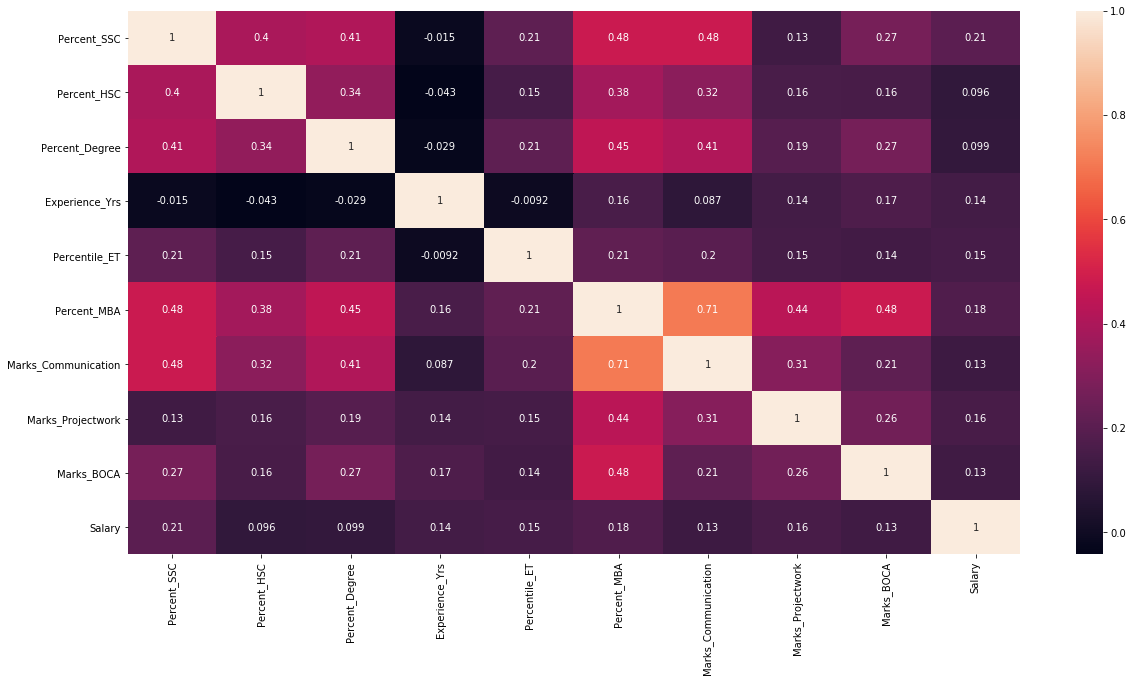

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_table,annot=True)

## Importing the stats model ols to check the statistical tests

In [10]:
import statsmodels.formula.api as smf

In [11]:
model1=smf.ols('Salary~Gender+Percent_SSC+Board_SSC+ Percent_HSC+Board_HSC+ Stream_HSC+Percent_Degree+Course_Degree+Experience_Yrs+Entrance_Test+Percentile_ET+Percent_MBA+Specialization_MBA+Marks_Communication+Marks_Projectwork+Marks_BOCA+Placement',adm).fit() 

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     26.37
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           2.89e-76
Time:                        11:35:51   Log-Likelihood:                -4941.3
No. Observations:                 391   AIC:                             9951.
Df Residuals:                     357   BIC:                         1.009e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -1.848e+05   6.59e+04     -2.806      0.005   -3.14e+05   -5.53e+04
Gender[T.M]                             3.434e+04   9451.038      3.634      0.000    1.58e+04    5.29e+04
Board_SSC[T.ICSE]                      -2.094e+04   1.58e+04     -1.322      0.187   -5.21e+04    1.02e+04
Board_SSC[T.Others]                    -1.428e+04   1.36e+04     -1.054      0.293   -4.09e+04    1.24e+04
Board_HSC[T.ISC]                        1.507e+04   1.84e+04      0.820      0.413   -2.11e+04    5.12e+04
Board_HSC[T.Others]                     4191.2111   1.37e+04      0.307      0.759   -2.27e+04     3.1e+04
Stream_HSC[T.Commerce]                  3.452e+04    2.3e+04      1.501      0.134   -1.07e+04    7.98e+04
Stream_HSC[T.Science]                   2.756e+04   2.44e+04      1.130      0.259   -2.04e+04    7.55e+04
Course_Degree[T.Commerce]               -2.34e+04   2.76e+04     -0.848      0.397   -7.77e+04    3.09e+04
Course_Degree[T.Computer Applications] -3.013e+04      3e+04     -1.003      0.317   -8.92e+04     2.9e+04
Course_Degree[T.Engineering]            8933.9475    2.9e+04      0.308      0.758   -4.82e+04     6.6e+04
Course_Degree[T.Management]            -3.545e+04   2.63e+04     -1.350      0.178   -8.71e+04    1.62e+04
Course_Degree[T.Others]                -4.761e+04   4.41e+04     -1.080      0.281   -1.34e+05    3.91e+04
Course_Degree[T.Science]               -3.374e+04   3.05e+04     -1.106      0.269   -9.37e+04    2.63e+04
Entrance_Test[T.G-MAT]                  2522.5235   8.23e+04      0.031      0.976   -1.59e+05    1.64e+05
Entrance_Test[T.G-SAT]                 -4.001e+04   8.36e+04     -0.479      0.633   -2.04e+05    1.24e+05
Entrance_Test[T.GCET]                  -3.884e+04   6.05e+04     -0.642      0.522   -1.58e+05    8.02e+04
Entrance_Test[T.K-MAT]                  1.527e+04   2.44e+04      0.627      0.531   -3.26e+04    6.32e+04
Entrance_Test[T.MAT]                   -4.109e+04   1.81e+04     -2.267      0.024   -7.67e+04   -5446.522
Entrance_Test[T.Mang]                  -1.576e+04   2.47e+04     -0.638      0.524   -6.44e+04    3.29e+04
Entrance_Test[T.PGCET]                  3644.3240   3.48e+04      0.105      0.917   -6.47e+04     7.2e+04
Entrance_Test[T.XAT]                   -2.011e+04   8.11e+04     -0.248      0.804    -1.8e+05    1.39e+05
Specialization_MBA[T.Marketing & HR]   -2.153e+04   8925.988     -2.412      0.016   -3.91e+04   -3976.418
Specialization_MBA[T.Marketing & IB]   -1.747e+04   2.36e+04     -0.740      0.460   -6.39e+04     2.9e+04
Placement[T.Placed]                     2.668e+05   1.04e+04     25.706      0.000    2.46e+05    2.87e+05
Percent_SSC                             -175.1697    508.303     -0.345      0.731   -1

## From above summary we can observe only 
#### 1.. Gender 
#### 2..Entrance_Test
#### 3..Specialization_MBA
#### 4..Placement
#### 5..Experience_Yrs
## are passing the p-test so we are considering all the five varibles only

#### All the variables i.e. gender,Placement,Specilization_MBA,EntranceTest are categorical variables and we are prediticing the salary i.e. Continious variables there for i am going to test Regression models i.e. Linear regression ,Ridge and Lasso

### Before that i need to encode the string categorical variables to number variables i.e. Label Encoding....

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
lbs=LabelBinarizer()

In [15]:
new_specilization=lbs.fit_transform(adm.Specialization_MBA)

In [16]:
lbs.classes_

array(['Marketing & Finance', 'Marketing & HR', 'Marketing & IB'],
      dtype='<U19')

In [17]:
new1_specilization=pd.DataFrame(new_specilization,columns=lbs.classes_)
new1_specilization.head()

,Marketing & Finance,Marketing & HR,Marketing & IB
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [18]:
new_gender=lbs.fit_transform(adm.Gender)

In [19]:
new1_gender=pd.DataFrame(new_gender,columns=['Gender'])
new1_gender.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [20]:
new_Marks_Communication=pd.DataFrame(adm.Marks_Communication)
new_Marks_Communication.head()

,Marks_Communication
0,50
1,69
2,50
3,54
4,52


In [21]:
new_Marks_BOCA=pd.DataFrame(adm.Marks_BOCA)
new_Marks_BOCA.head()

,Marks_BOCA
0,74
1,75
2,59
3,62
4,67


In [22]:
new_Placement=lbs.fit_transform(adm.Placement)
new1_Placement=pd.DataFrame(new_Placement,columns=['Placement'])
new1_Placement.head()

,Placement
0,1
1,1
2,1
3,1
4,1


In [23]:
new_Entrance_Test=lbs.fit_transform(adm.Entrance_Test)


In [24]:
lbs.classes_

array(['CAT', 'G-MAT', 'G-SAT', 'GCET', 'K-MAT', 'MAT', 'Mang', 'PGCET',
       'XAT'], dtype='<U5')

In [25]:
new1_Entrance_Test=pd.DataFrame(new_Entrance_Test,columns=lbs.classes_)
new1_Entrance_Test.head()

,CAT,G-MAT,G-SAT,GCET,K-MAT,MAT,Mang,PGCET,XAT
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [26]:
new1_Entrance_Test.head()

,CAT,G-MAT,G-SAT,GCET,K-MAT,MAT,Mang,PGCET,XAT
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0


In [27]:
new1_gender.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [28]:
new1_Experience_Yrs=pd.DataFrame(adm.Experience_Yrs)

In [29]:
new1_Experience_Yrs.head()

,Experience_Yrs
0,0
1,1
2,0
3,0
4,1


In [30]:
new1_Salary=pd.DataFrame(adm.Salary)

In [31]:
new1_Salary.head()

,Salary
0,270000
1,200000
2,240000
3,250000
4,180000


In [32]:
final=pd.concat([new1_gender,new1_Entrance_Test,new1_Experience_Yrs,new_Marks_Communication,new_Marks_BOCA,new1_specilization,new1_Placement,new1_Salary],axis=1)
final.head()

,Gender,CAT,G-MAT,G-SAT,GCET,K-MAT,MAT,Mang,PGCET,XAT,Experience_Yrs,Marks_Communication,Marks_BOCA,Marketing & Finance,Marketing & HR,Marketing & IB,Placement,Salary
0,1,0,0,0,0,0,1,0,0,0,0,50,74,0,1,0,1,270000
1,1,0,0,0,0,0,1,0,0,0,1,69,75,1,0,0,1,200000
2,1,0,0,0,0,0,0,1,0,0,0,50,59,1,0,0,1,240000
3,1,0,0,0,0,0,1,0,0,0,0,54,62,1,0,0,1,250000
4,1,0,0,0,0,0,1,0,0,0,1,52,67,0,1,0,1,180000


In [33]:
x=final.drop('Salary',axis=1)
x.head()

,Gender,CAT,G-MAT,G-SAT,GCET,K-MAT,MAT,Mang,PGCET,XAT,Experience_Yrs,Marks_Communication,Marks_BOCA,Marketing & Finance,Marketing & HR,Marketing & IB,Placement
0,1,0,0,0,0,0,1,0,0,0,0,50,74,0,1,0,1
1,1,0,0,0,0,0,1,0,0,0,1,69,75,1,0,0,1
2,1,0,0,0,0,0,0,1,0,0,0,50,59,1,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,54,62,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,1,52,67,0,1,0,1


In [34]:
y=final['Salary']
y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
LR=LinearRegression()

In [39]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
ypredict=LR.predict(xtest)

In [41]:
rmse=np.sqrt((np.mean(ytest-ypredict)**2))
print("rmse score of the Linear Regression value is",rmse)

rmse score of the Linear Regression value is 8838.19990804391


In [42]:
from sklearn.linear_model import Ridge,Lasso

In [43]:
Rid=Ridge(alpha=0.03,normalize=True)

In [44]:
Lass=Lasso(alpha=0.03,normalize=True)

In [45]:
Rid.fit(xtrain,ytrain)

Ridge(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [46]:
ypredict1=Rid.predict(xtest)

In [47]:
ypredict1=pd.Series(ypredict1)
ypredict1.head()

0     27625.034477
1    290475.349403
2     53445.508116
3    296300.881416
4    297115.287133
dtype: float64

In [48]:
rmse_ridge=np.sqrt((np.mean(ytest-ypredict1)**2))
print("rmse score of the Ridge value is",rmse_ridge)
print('The R2 value of the ridge model is',Rid.score(xtest,ytest))

rmse score of the Ridge value is 2462.565053496758
The R2 value of the ridge model is 0.6973832148392674


In [49]:
Lass.fit(xtrain,ytrain)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [50]:
ypredict2=Lass.predict(xtest)

In [51]:
ypredict2=pd.Series(ypredict2)
ypredict2.head()

0     21536.853999
1    293095.479335
2     47903.041688
3    298094.823523
4    299681.587705
dtype: float64

In [52]:
rmse_Lasso=np.sqrt((np.mean(ytest-ypredict2)**2))
print("rmse score of the Lasso Regression value is",rmse_Lasso)

rmse score of the Lasso Regression value is 1687.778178964352


In [53]:
Lass.score(xtest,ytest)

0.6968963516393136

In [55]:
x_new=final.drop('Placement',axis=1)
x_new.head()

,Gender,CAT,G-MAT,G-SAT,GCET,K-MAT,MAT,Mang,PGCET,XAT,Experience_Yrs,Marks_Communication,Marks_BOCA,Marketing & Finance,Marketing & HR,Marketing & IB,Salary
0,1,0,0,0,0,0,1,0,0,0,0,50,74,0,1,0,270000
1,1,0,0,0,0,0,1,0,0,0,1,69,75,1,0,0,200000
2,1,0,0,0,0,0,0,1,0,0,0,50,59,1,0,0,240000
3,1,0,0,0,0,0,1,0,0,0,0,54,62,1,0,0,250000
4,1,0,0,0,0,0,1,0,0,0,1,52,67,0,1,0,180000


In [56]:
y_new=final['Placement']
y_new.head()

0    1
1    1
2    1
3    1
4    1
Name: Placement, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logis=LogisticRegression()

In [63]:
from sklearn.model_selection import KFold

In [65]:
kf=KFold(n_splits=3,shuffle=True,random_state=1)

In [69]:
for train,test in kf.split(x_new,y_new):
    xtrain1,xtest1=x_new.iloc[train],x_new.iloc[test]
    ytrain1,ytest1=y_new.iloc[train],y_new.iloc[test]
    logis.fit(xtrain1,ytrain1)
    ypredict_new=logis.predict(xtest1)
    
    

/Users/mithanedar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithanedar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mithanedar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc



In [71]:
con=metrics.confusion_matrix(ytest1,ypredict_new)
con

array([[ 24,   0],
       [  0, 106]])

In [72]:
acc=metrics.accuracy_score(ytest1,ypredict_new)
acc

1.0

In [75]:
fpr,tpr,_=roc_curve(ytest1,ypredict_new)
print(fpr,tpr)

[0. 0. 1.] [0. 1. 1.]
